In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import elasticite as el
import numpy as np
duration = el.get_default_args(el.EdgeGrid.render)['duration']

In [3]:
import sys
sys.path.append('..')
from scenario_line_fresnel import EdgeGrid
e = EdgeGrid(N_lame=25, grid_type='line')

In [4]:
e.lames.shape

(4, 31)

## Point-Line Distance--2-Dimensional

See http://mathworld.wolfram.com/Point-LineDistance2-Dimensional.html


In [5]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
#%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

[[ 0.2 -0.5  0.3]
 [ 0.3  1.1  0.9]]


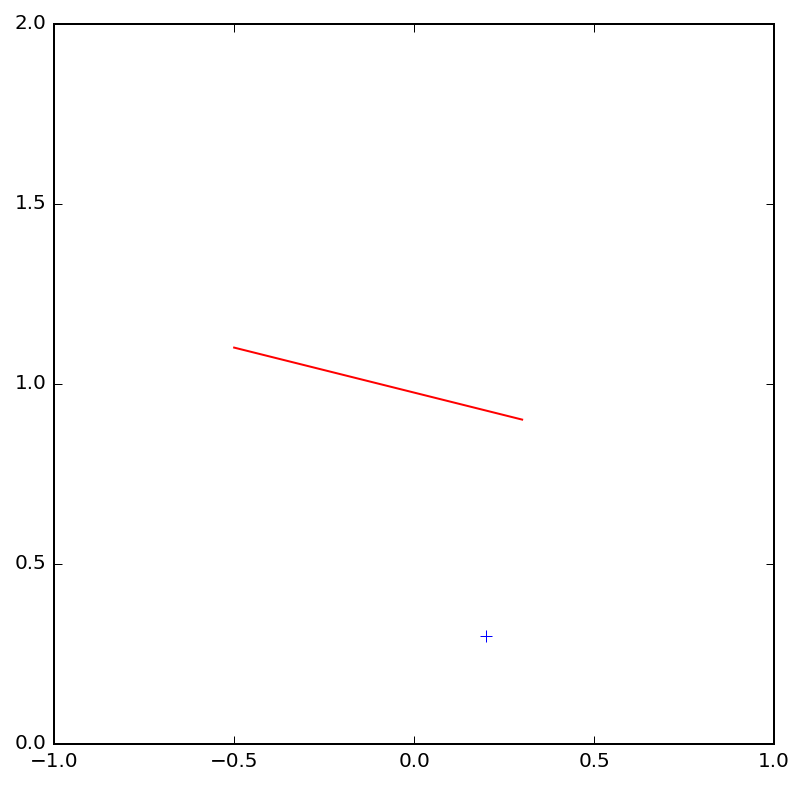

In [6]:
particles = np.array([[.2, .3], [-.5, 1.1], [.3, .9]]).T
fig = plt.figure(figsize=(5, 5))
border = 0.0
ax = fig.add_axes((border, border, 1.-2*border, 1.-2*border), axisbg='w')
ax.plot(particles[0, 0], particles[1, 0], 'b+')
ax.plot(particles[0, 1:], particles[1, 1:], 'r')
ax.set_xlim([-1, 1])
ax.set_ylim([0, 2])
print(particles)

projection du point sur la droite

[[ 0.2 -0.5  0.3]
 [ 1.5  0.8  0.9]]
[ 0.2  1.5]
[[-0.8 -0.5]
 [-0.9  0.3]]
[ 0.1 -0.8]
0.49 0.80622577483 0.607770199487
[ 0.28  0.9 ]


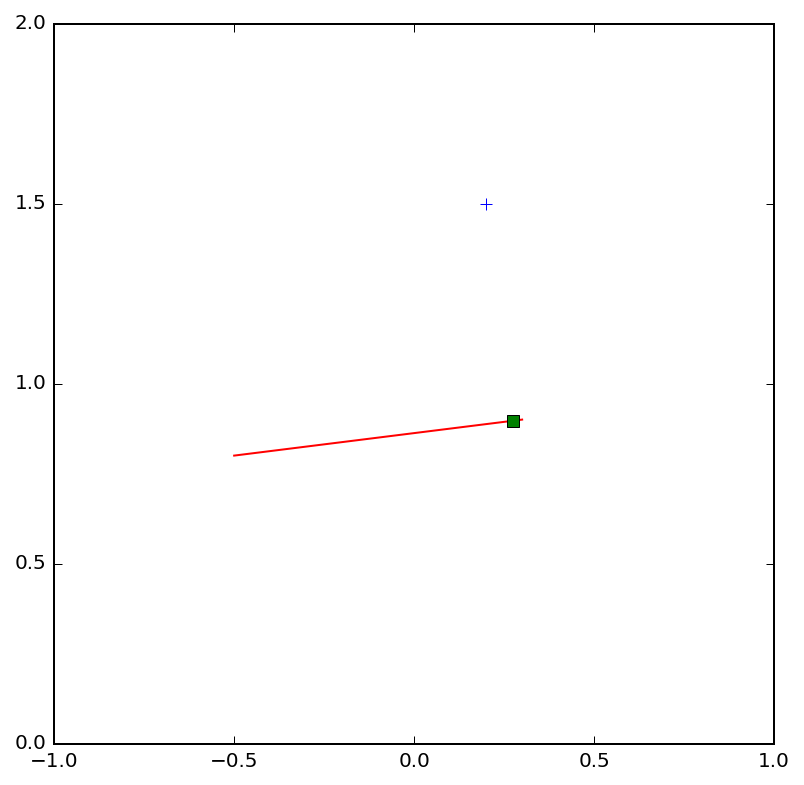

In [7]:
particles = np.array([[.2, 1.4], [-.5, 1.], [.4, 1.]]).T
particles = np.array([[.2, 1.5], [-.5, .8], [.3, .9]]).T
print(particles)
P = particles[:, 0].copy()
print(P)
print(np.dot(particles[:, 1:].T, np.array([[0, 1], [-1, 0]])))
perp = np.zeros_like(P)
perp[0] = particles[1, 2] - particles[1, 1]
perp[1] = -(particles[0, 2] - particles[0, 1])
print(perp)
# distance to the line
d = perp[0]*(particles[0, 1] - particles[0, 0]) + perp[1]*(particles[1, 1] - particles[1, 0])
print(d, np.sqrt(perp[0]**2 + perp[1]**2), d/np.sqrt(perp[0]**2 + perp[1]**2))
# normalizing
#perp /= np.sqrt((perp**2).sum())
#perp /= np.sqrt(perp[0]**2 + perp[1]**2)
P += d * perp / (perp[0]**2 + perp[1]**2)
fig = plt.figure(figsize=(5, 5))
border = 0.0
ax = fig.add_axes((border, border, 1.-2*border, 1.-2*border), axisbg='w')
ax.plot(particles[0, 0], particles[1, 0], 'b+')
ax.plot(particles[0, 1:], particles[1, 1:], 'r')
ax.plot(P[0], P[1], 'gs')
ax.set_xlim([-1, 1])
ax.set_ylim([0, 2])
print(P)

shorter form

[ 0.28  0.9 ]


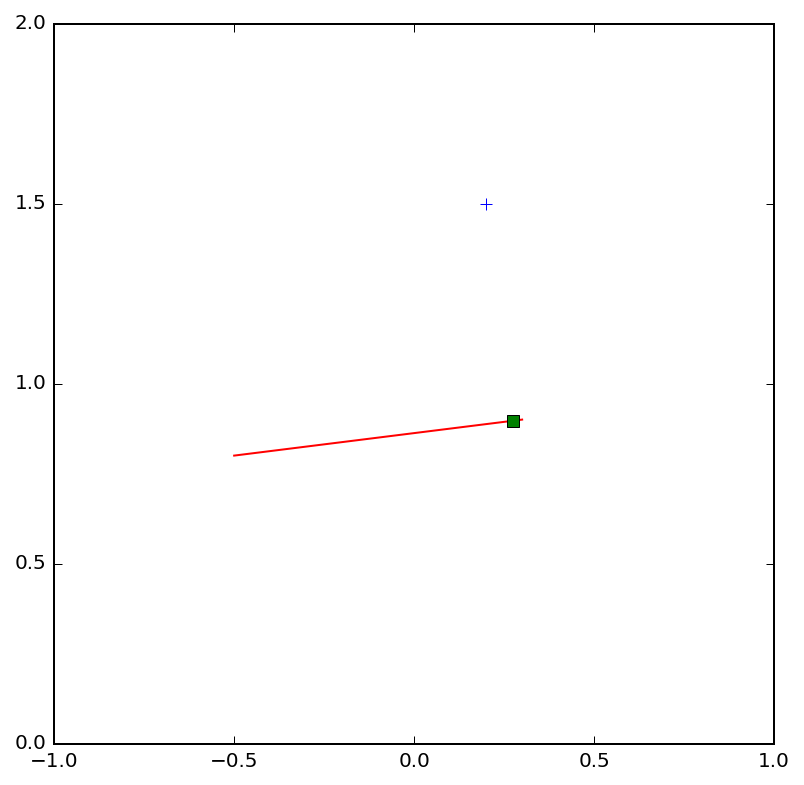

In [8]:
particles = np.array([[.2, 1.4], [-.5, 1.], [.4, 1.]]).T
particles = np.array([[.2, 1.5], [-.5, .8], [.3, .9]]).T
perp = np.array([particles[1, 2] - particles[1, 1], -(particles[0, 2] - particles[0, 1])])
# distance to the line
d = perp[0]*(particles[0, 1] - particles[0, 0]) + perp[1]*(particles[1, 1] - particles[1, 0])
P =  particles[:, 0] + d * perp / (perp**2).sum()

fig = plt.figure(figsize=(5, 5))
border = 0.0
ax = fig.add_axes((border, border, 1.-2*border, 1.-2*border), axisbg='w')
ax.plot(particles[0, 0], particles[1, 0], 'b+')
ax.plot(particles[0, 1:], particles[1, 1:], 'r')
ax.plot(P[0], P[1], 'gs')
ax.set_xlim([-1, 1])
ax.set_ylim([0, 2])
print(P)

deducing the mirror image as twice this projection

[ 0.35  0.29]


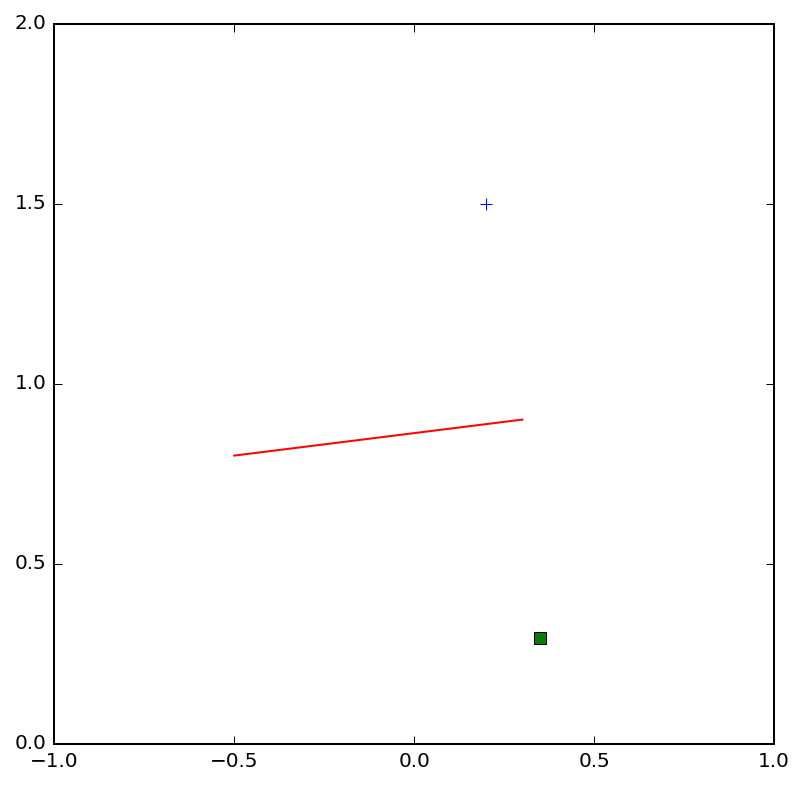

In [9]:
particles = np.array([[.2, 1.4], [-.5, 1.], [.4, 1.]]).T
particles = np.array([[.2, 1.5], [-.5, .8], [.3, .9]]).T
perp = np.array([particles[1, 2] - particles[1, 1], -(particles[0, 2] - particles[0, 1])])
# distance to the line
d = perp[0]*(particles[0, 1] - particles[0, 0]) + perp[1]*(particles[1, 1] - particles[1, 0])
P =  particles[:, 0] + 2 *d * perp / (perp**2).sum()

fig = plt.figure(figsize=(5, 5))
border = 0.0
ax = fig.add_axes((border, border, 1.-2*border, 1.-2*border), axisbg='w')
ax.plot(particles[0, 0], particles[1, 0], 'b+')
ax.plot(particles[0, 1:], particles[1, 1:], 'r')
ax.plot(P[0], P[1], 'gs')
ax.set_xlim([-1, 1])
ax.set_ylim([0, 2])
print(P)

a function

In [10]:
particles.T.tolist()

[[0.2, 1.5], [-0.5, 0.8], [0.3, 0.9]]

[[ 0.76  0.42  0.25  0.92  0.71  0.14  0.9   0.93  0.81  0.46]
 [ 0.04  0.44  0.12  0.04  0.74  0.43  0.39  0.35  0.23  0.65]]
[[-0.5  0.5]
 [ 0.5  1.5]]
[[-0.96 -0.56 -0.88 -0.96 -0.26 -0.57 -0.61 -0.65 -0.77 -0.35]
 [ 1.76  1.42  1.25  1.92  1.71  1.14  1.9   1.93  1.81  1.46]]


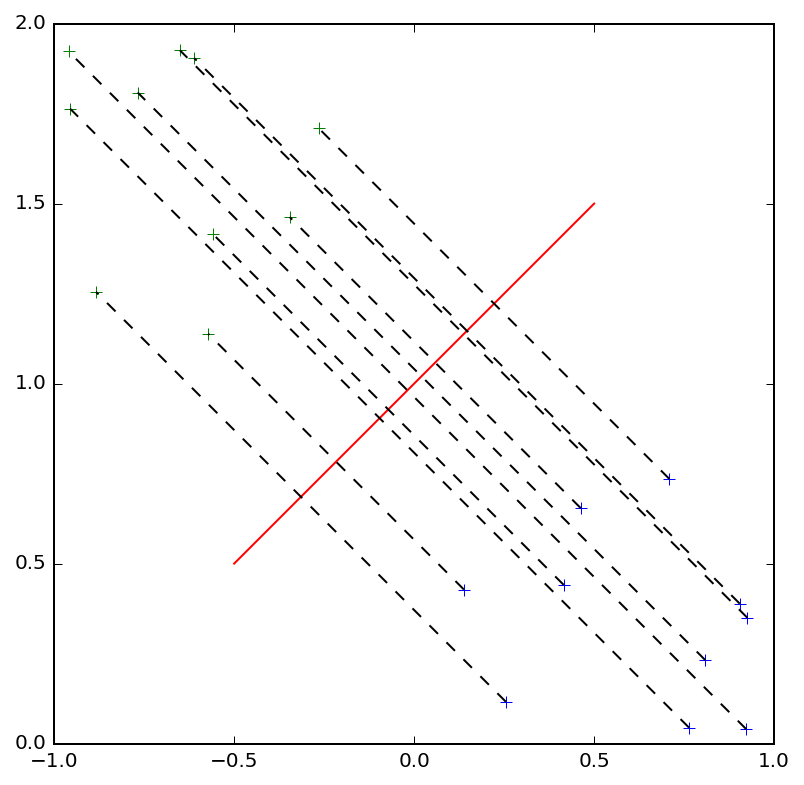

In [11]:
particles = np.array([[.2, 1.5], [-.5, .8], [.3, .9]]).T
particles = np.random.rand(2, 10)
print(particles)
segment = np.array([[-.5, .5], [.5, 1.5]]).T
print(segment)
def mirror(particles, segment, alpha=1.):
    mirror = particles.copy()
    perp = np.array([segment[1][1] - segment[1][0], -(segment[0][1] - segment[0][0])])
    # distance to the line
    d = perp[0]*(segment[0][1] - particles[0, :]) + perp[1]*(segment[1, 1] - particles[1, :])
    mirror[:2, :] =  particles[:2, :] + 2. * d[np.newaxis, :] * perp[:, np.newaxis] / (perp**2).sum()
    if mirror.shape[0]>2: mirror[2, :] =  alpha * particles[2, :] 
    return mirror

particles_mirror = mirror(particles, segment)

fig = plt.figure(figsize=(5, 5))
border = 0.0
ax = fig.add_axes((border, border, 1.-2*border, 1.-2*border), axisbg='w')
ax.plot(particles[0, :], particles[1, :], 'b+')
ax.plot(segment[0, :], segment[1, :], 'r')
ax.plot(particles_mirror[0, :], particles_mirror[1, :], 'g+')
ax.plot(np.vstack((particles[0, :], particles_mirror[0, :])), np.vstack((particles[1, :], particles_mirror[1, :])), 'k--')
ax.set_xlim([-1, 1])
ax.set_ylim([0, 2])
print(particles_mirror)

## on applique maintenant à la structure

la structure est représentée par une liste de segments sur lesquels on a tiré des points 

[[-1.45 -3.53 -3.85  1.45  3.53  3.85]
 [ 3.11  1.36 -1.46  3.11  1.36 -1.46]
 [ 3.4   4.28  4.92 -0.26 -1.13 -1.78]]


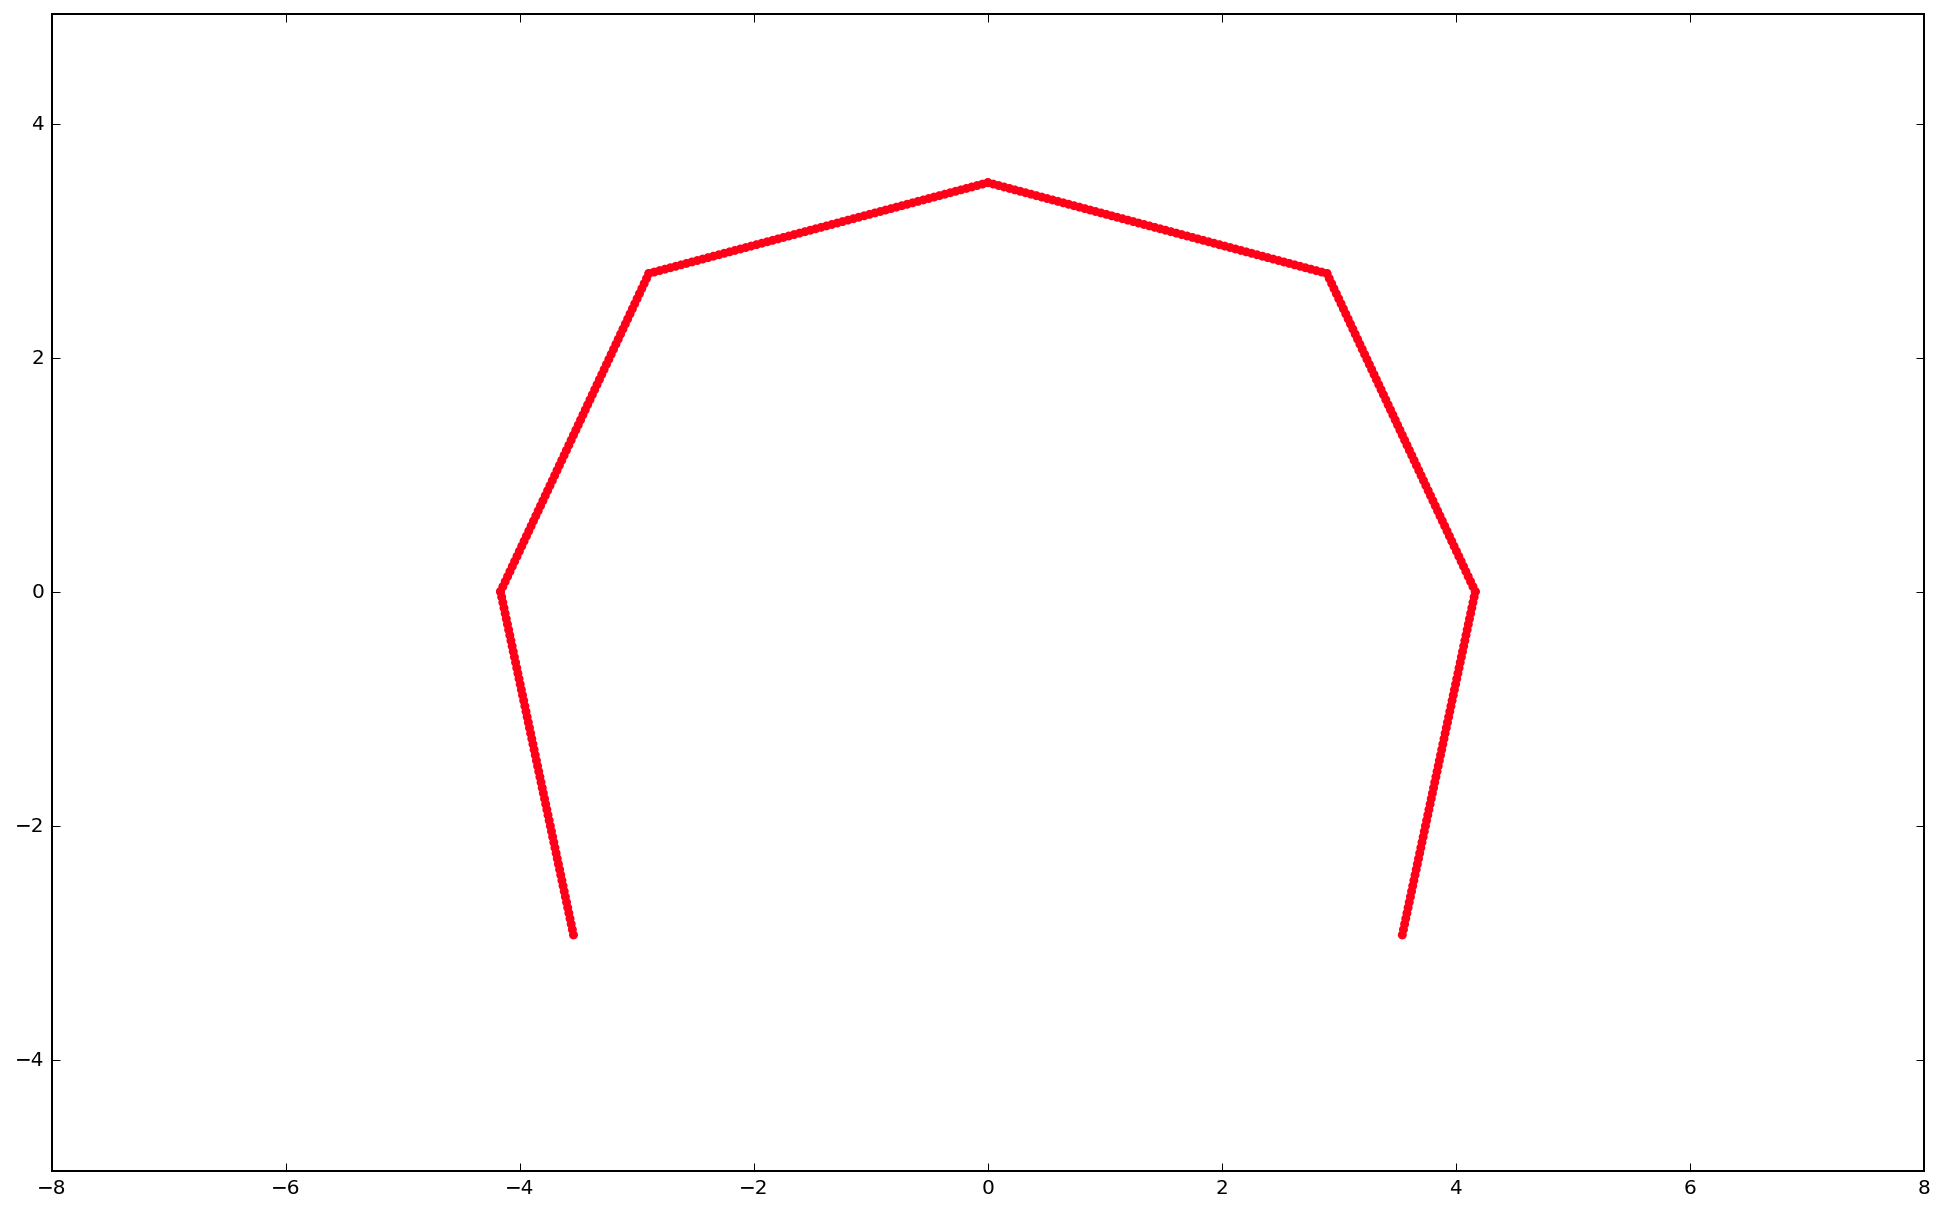

In [12]:
import elasticite as el
import numpy as np

e = el.EdgeGrid(N_lame=25, grid_type='line')
e.sample_structure()
fig, ax = e.plot_structure()
print(e.do_structure())

In [13]:
segments = e.structure_as_segments()
print(segments)

[array([[ 0.  ,  3.5 ],
       [-2.9 ,  2.72]]), array([[-2.9 ,  2.72],
       [-4.17,  0.  ]]), array([[-4.17,  0.  ],
       [-3.54, -2.93]]), array([[ 0.  ,  3.5 ],
       [ 2.9 ,  2.72]]), array([[ 2.9 ,  2.72],
       [ 4.17,  0.  ]]), array([[ 4.17,  0.  ],
       [ 3.54, -2.93]])]


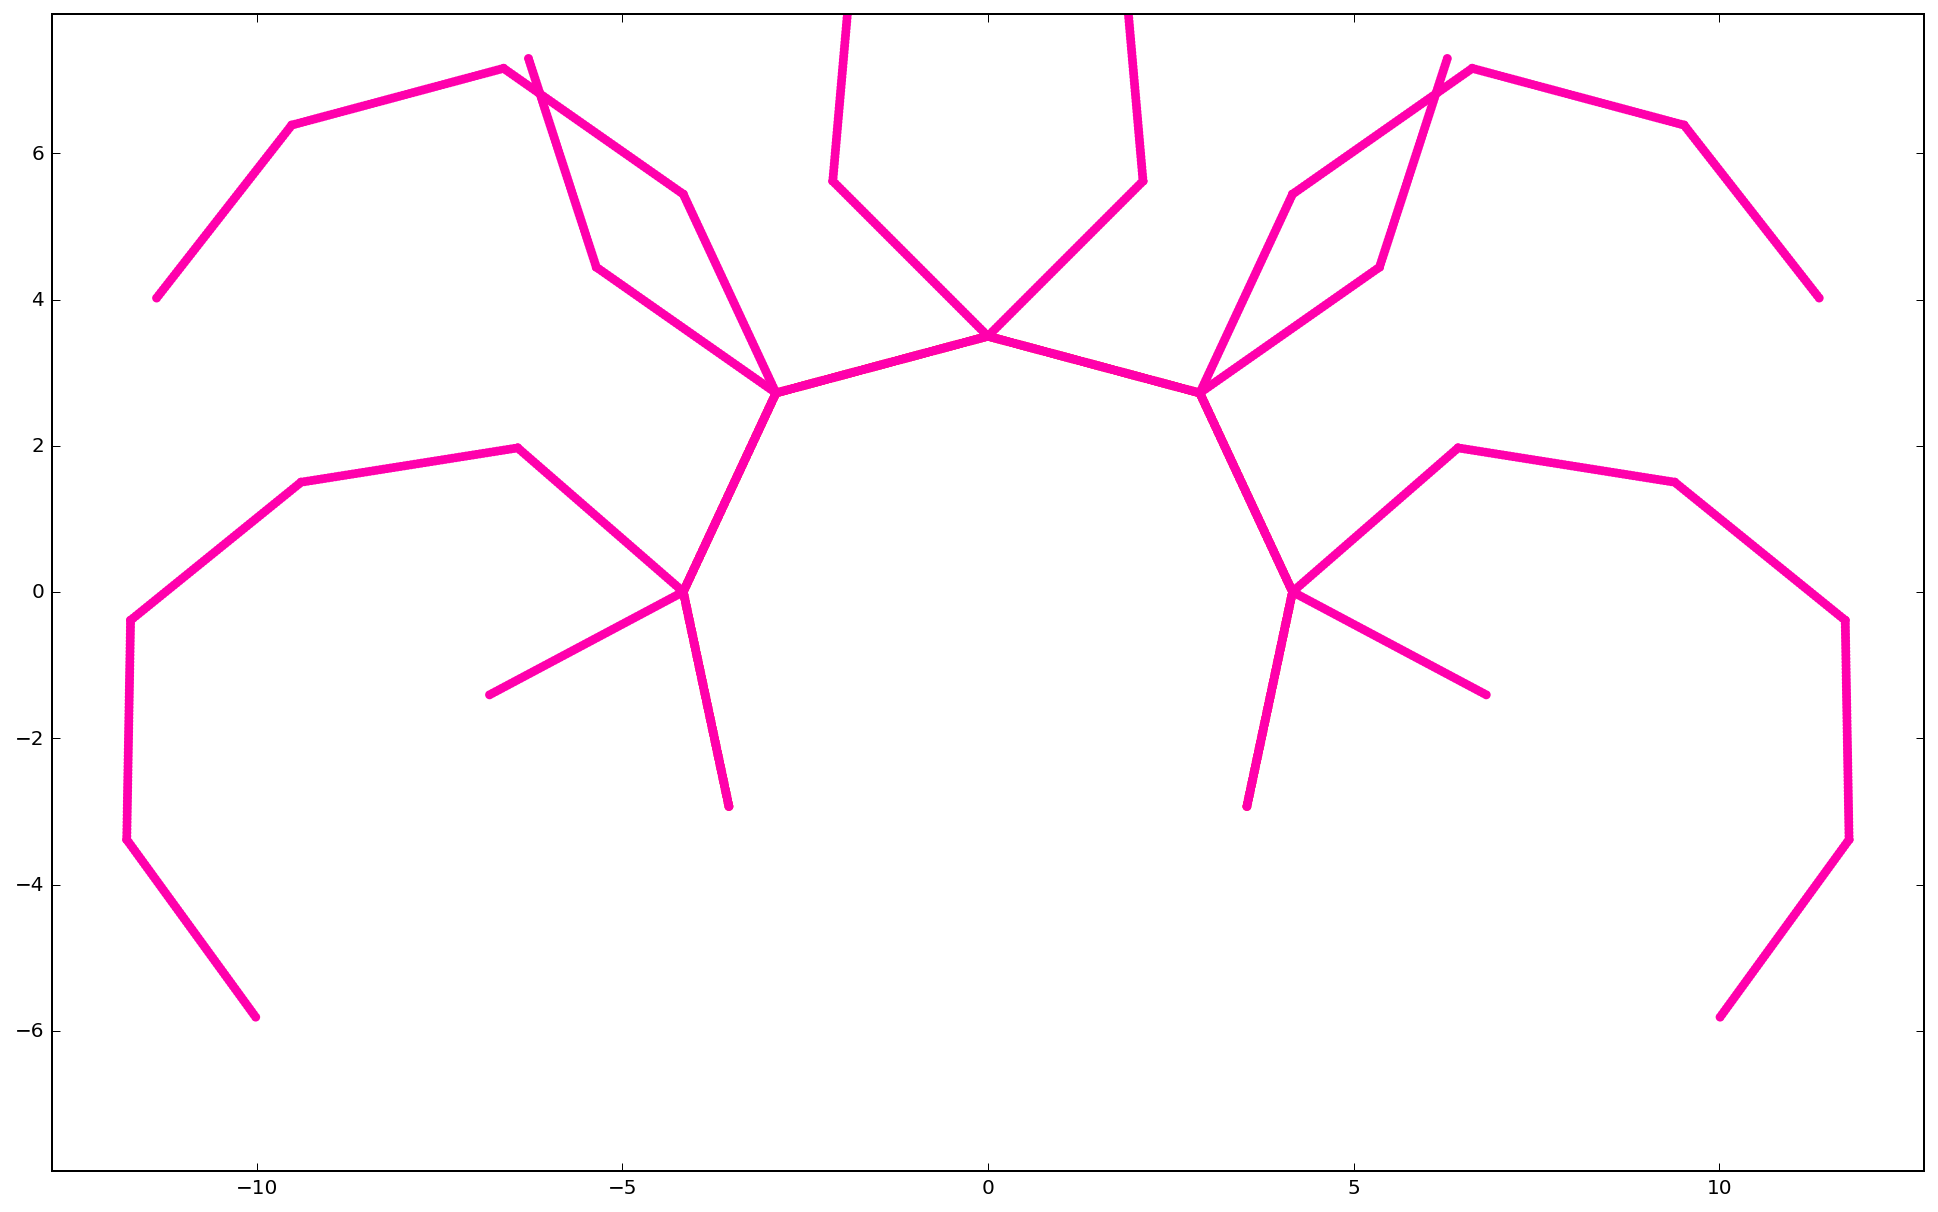

In [20]:
e = el.EdgeGrid(N_lame=25, grid_type='line')
e.sample_structure()
alpha = .8
particles = e.particles.copy()
particles_mirror = particles.copy()
for segment in segments:
    particles_mirror = np.hstack((particles_mirror, mirror(particles, segment, alpha)))
    #print(particles_mirror.shape)#, mirror(e.particles, np.array(segment))).shape)

e.particles = particles_mirror
e.total_width *= 1.6
fig, ax = e.plot_structure()

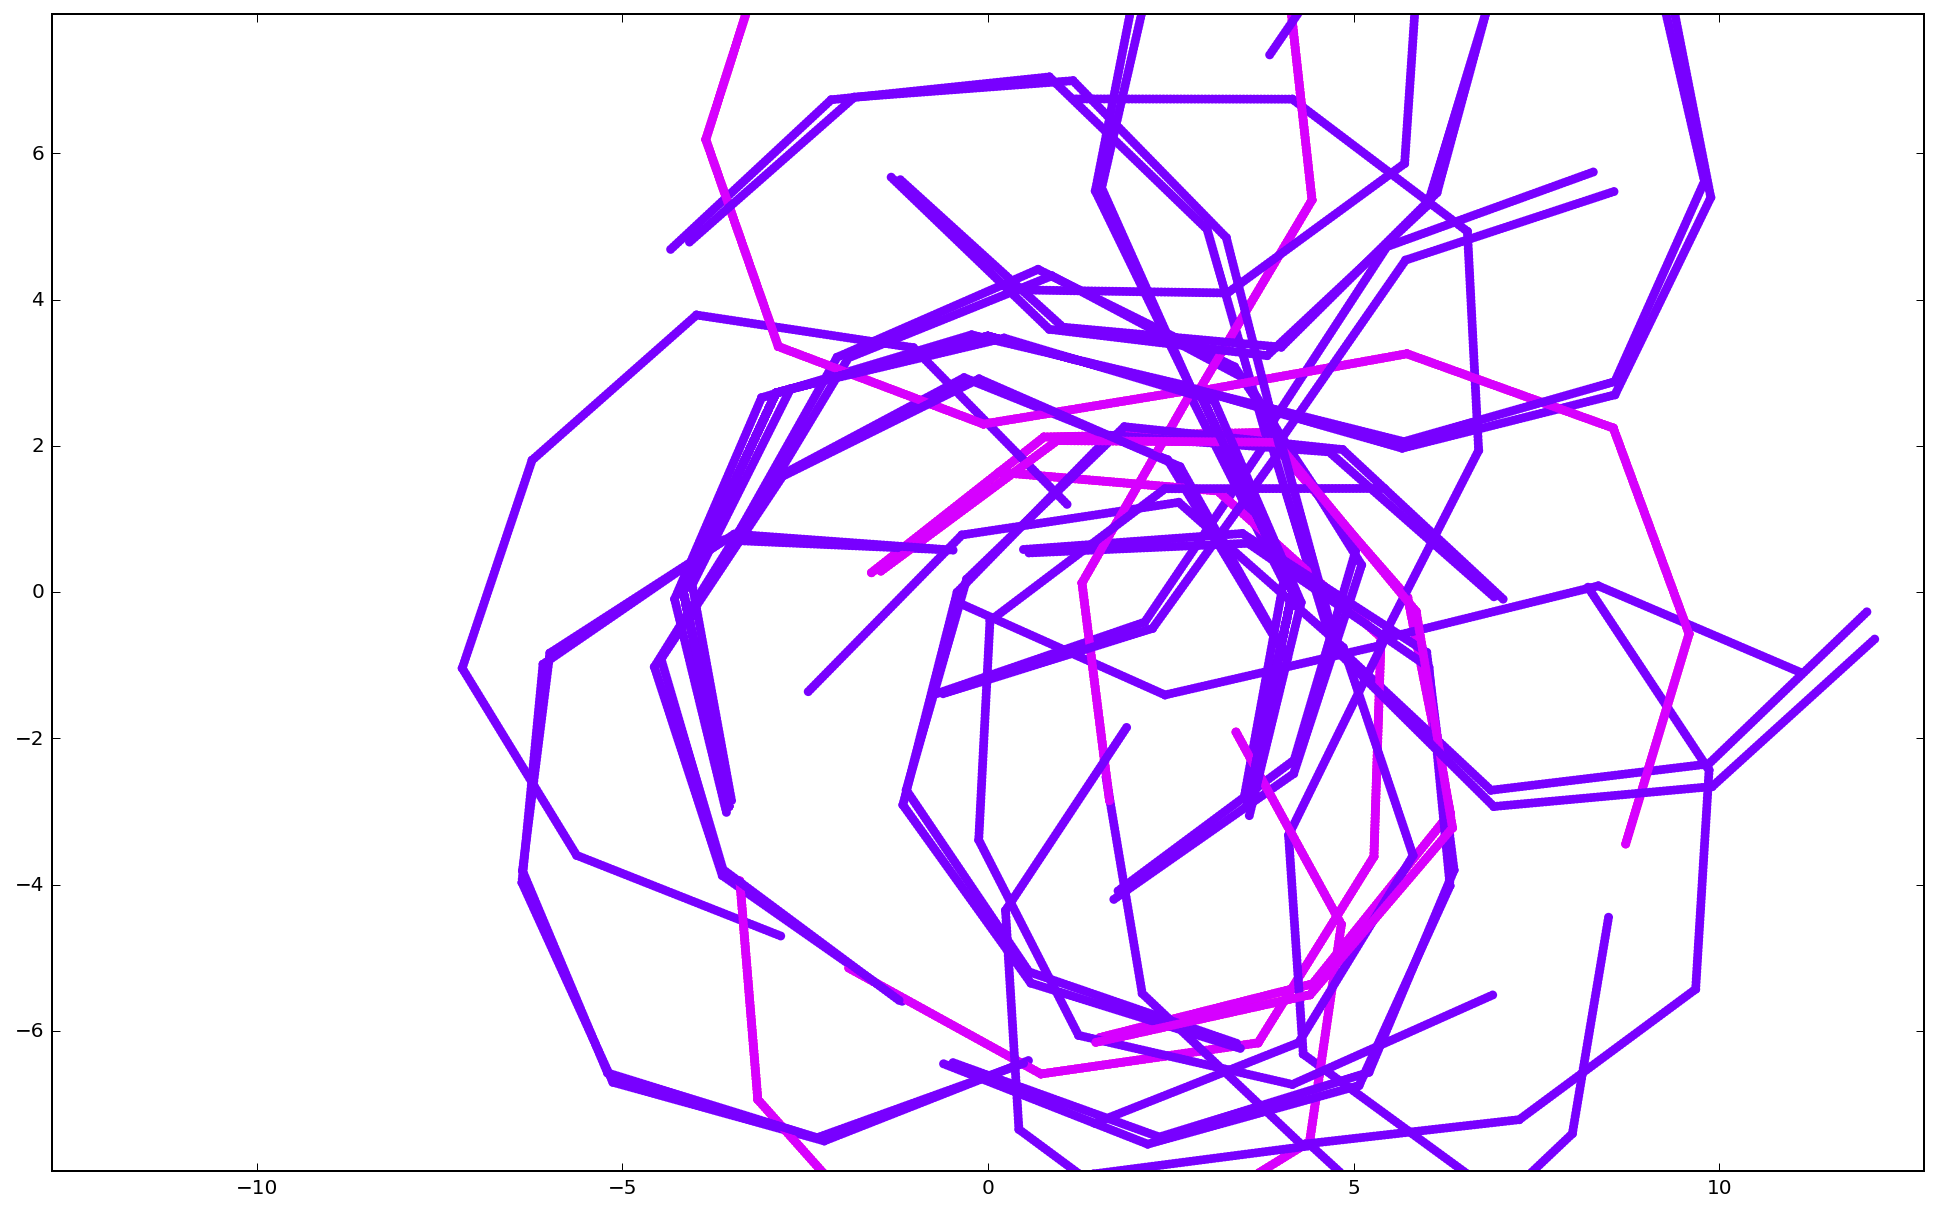

In [16]:
alpha *= .8
particles = e.particles.copy()
particles_mirror = particles.copy()
for segment in segments:
    particles_mirror = np.hstack((particles_mirror, mirror(particles, np.array(segment), alpha)))
    #print(particles_mirror.shape)#, mirror(e.particles, np.array(segment))).shape)

e.particles = particles_mirror
fig, ax = e.plot_structure()

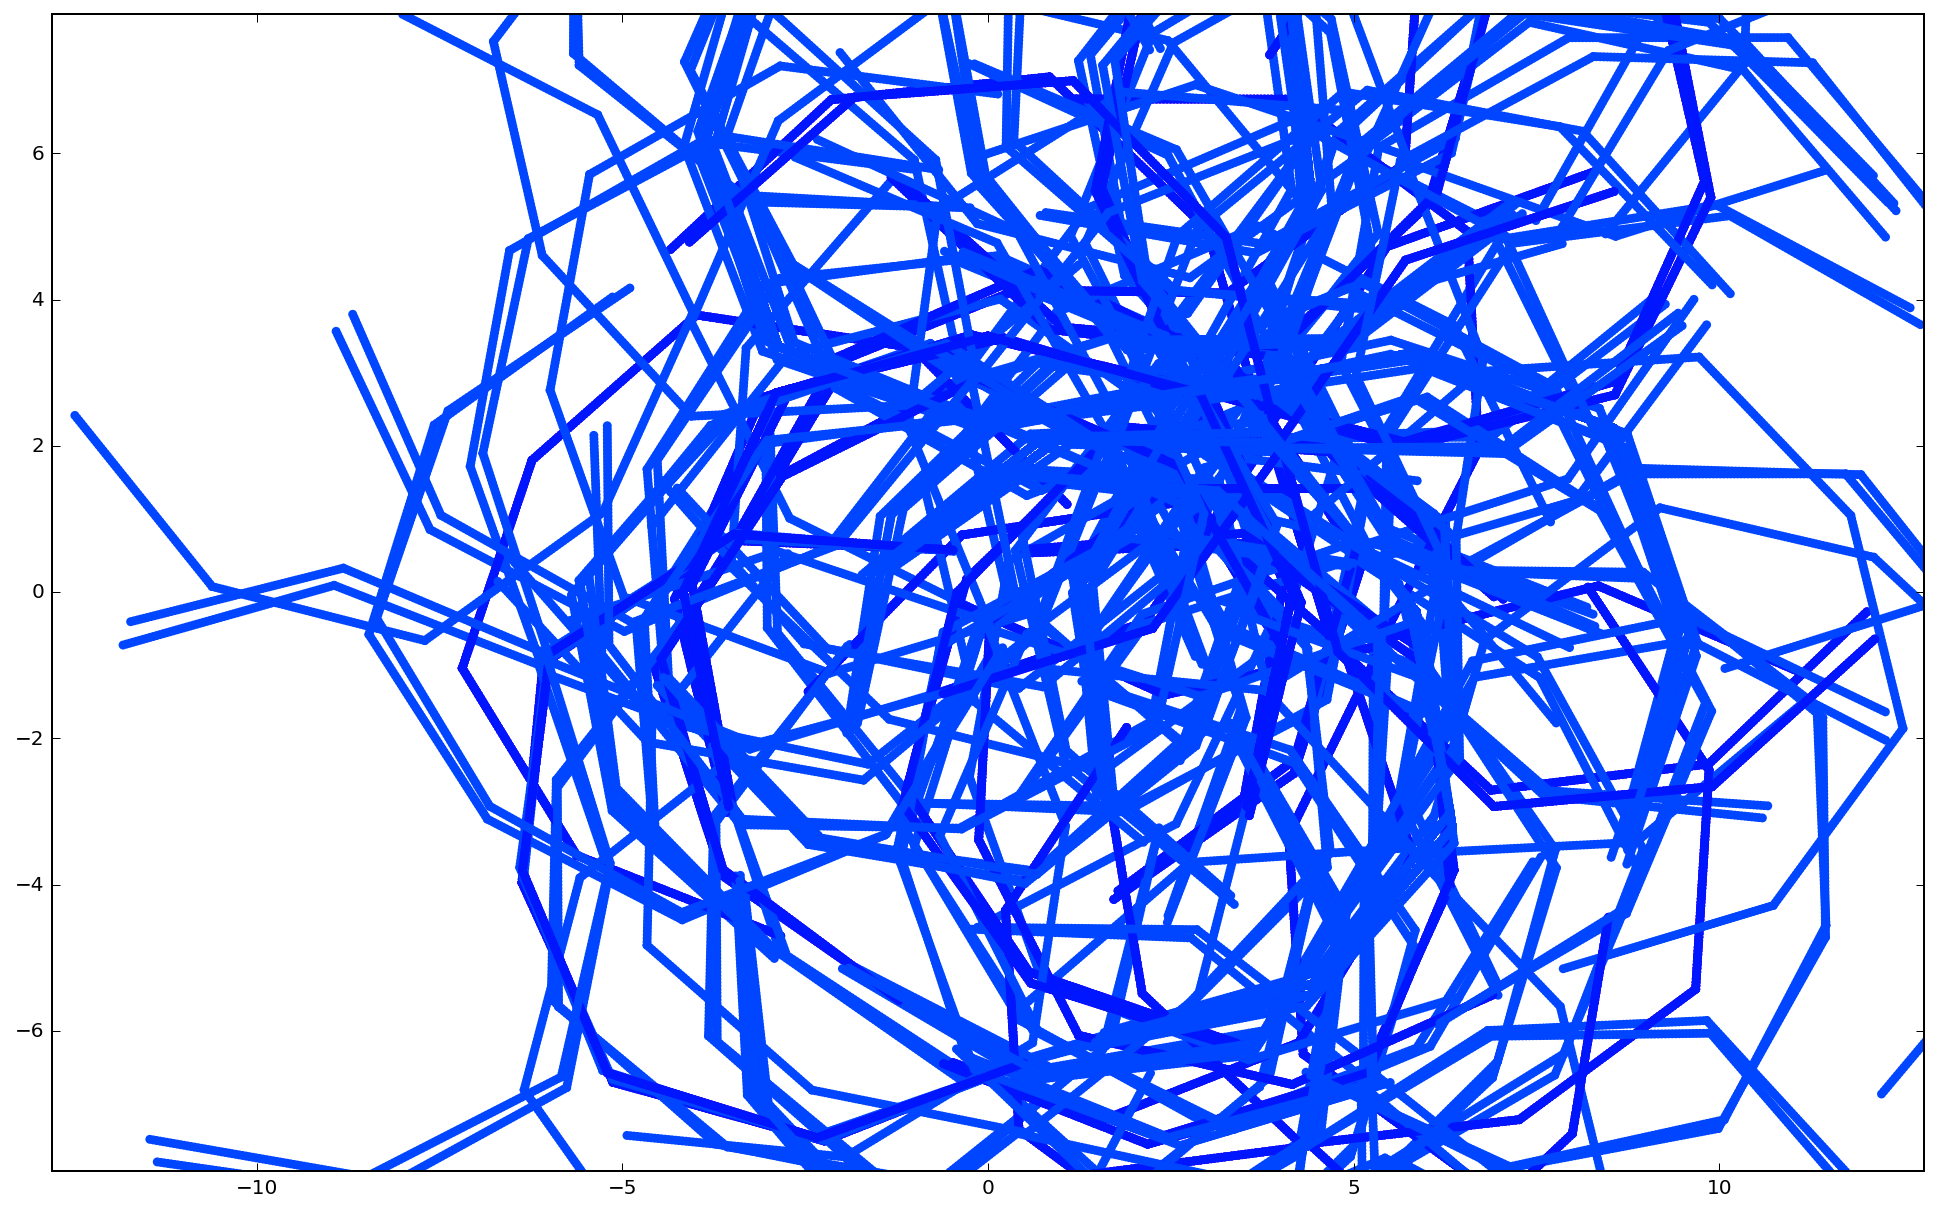

In [17]:
alpha *= .8
particles = e.particles.copy()
particles_mirror = particles.copy()
for segment in segments:
    particles_mirror = np.hstack((particles_mirror, mirror(particles, np.array(segment), alpha)))
    #print(particles_mirror.shape)#, mirror(e.particles, np.array(segment))).shape)

e.particles = particles_mirror
fig, ax = e.plot_structure()

Summming up everything in a few functions:


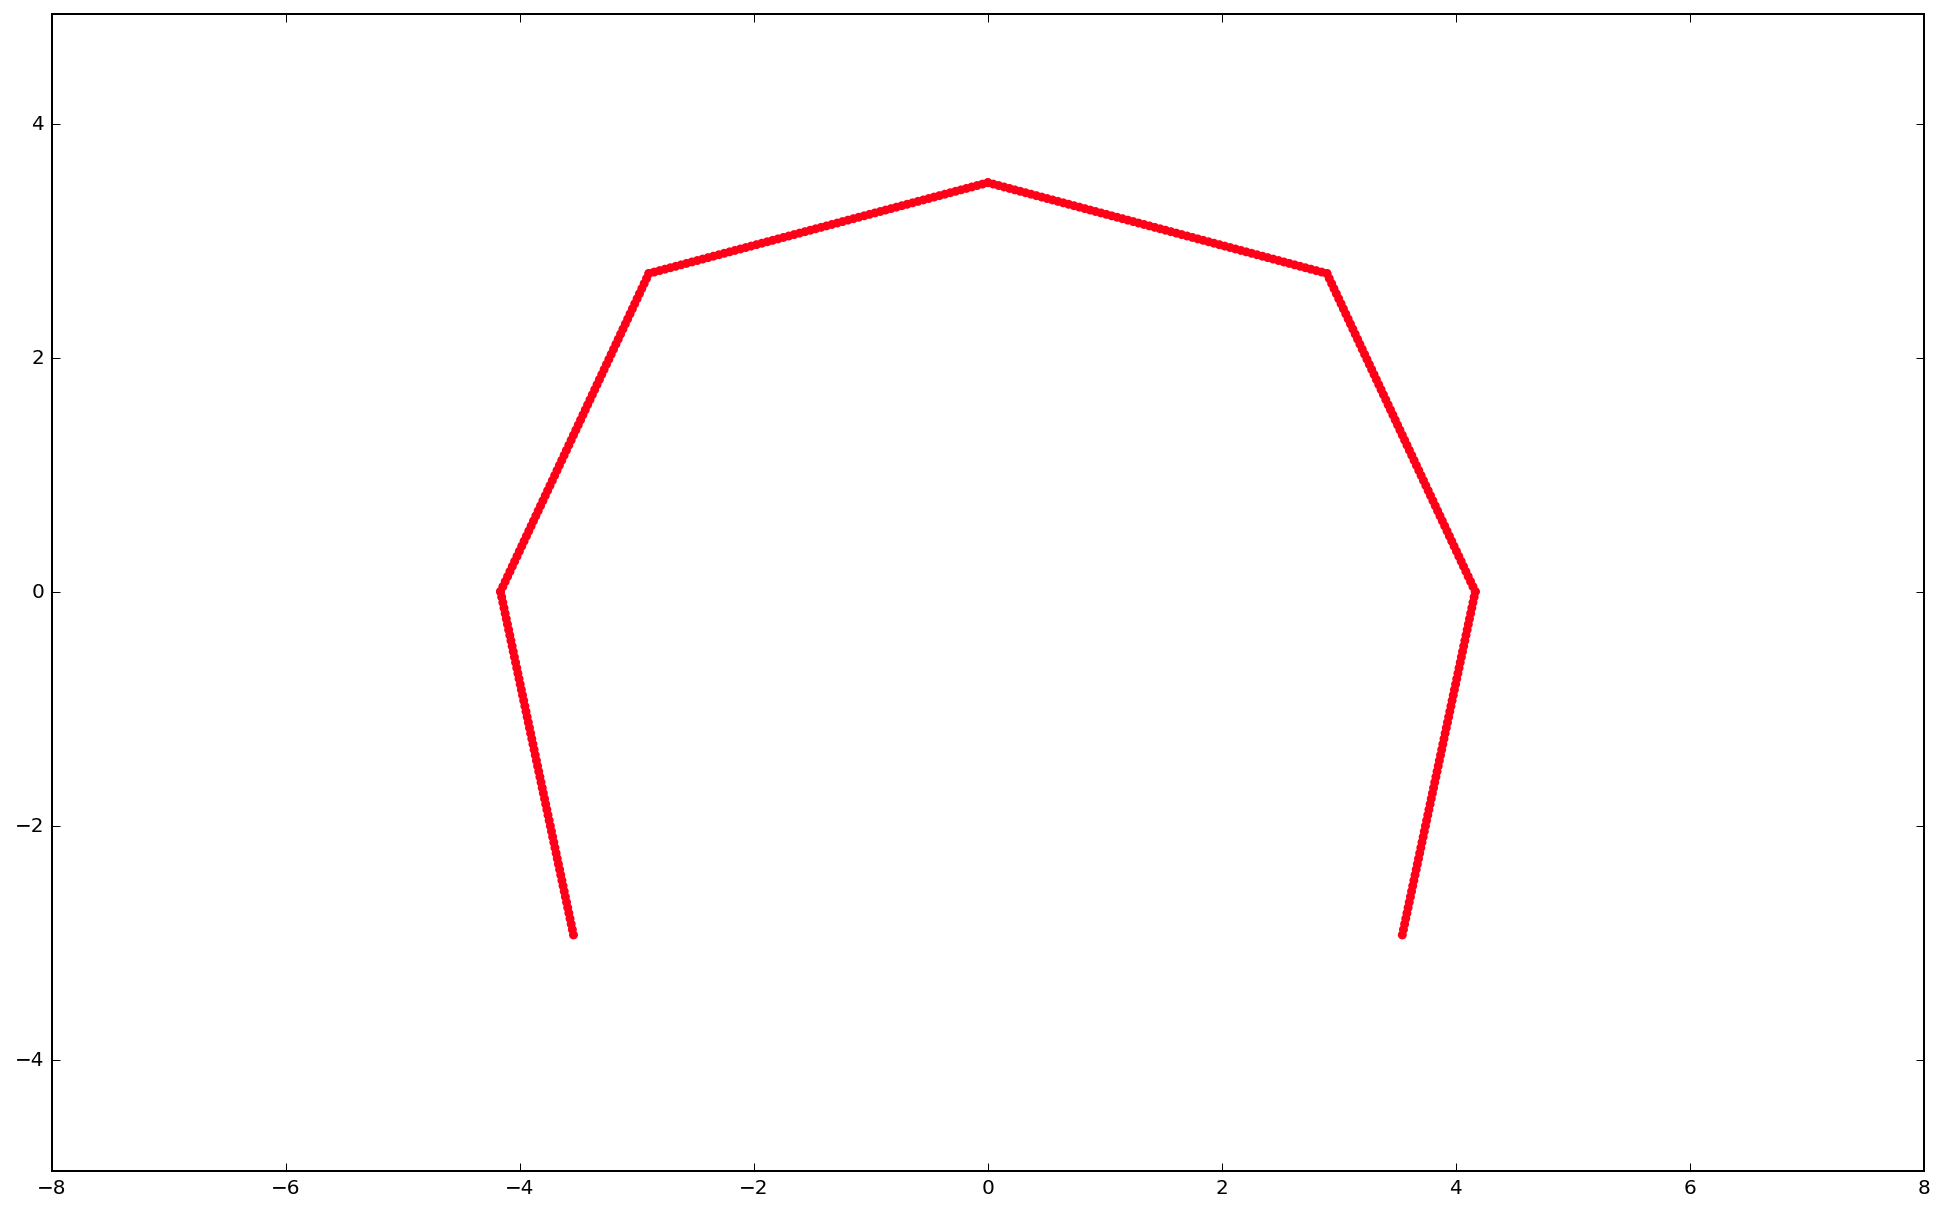

In [18]:
e = el.EdgeGrid(N_lame=25, grid_type='line')
e.sample_structure()
fig, ax = e.plot_structure()

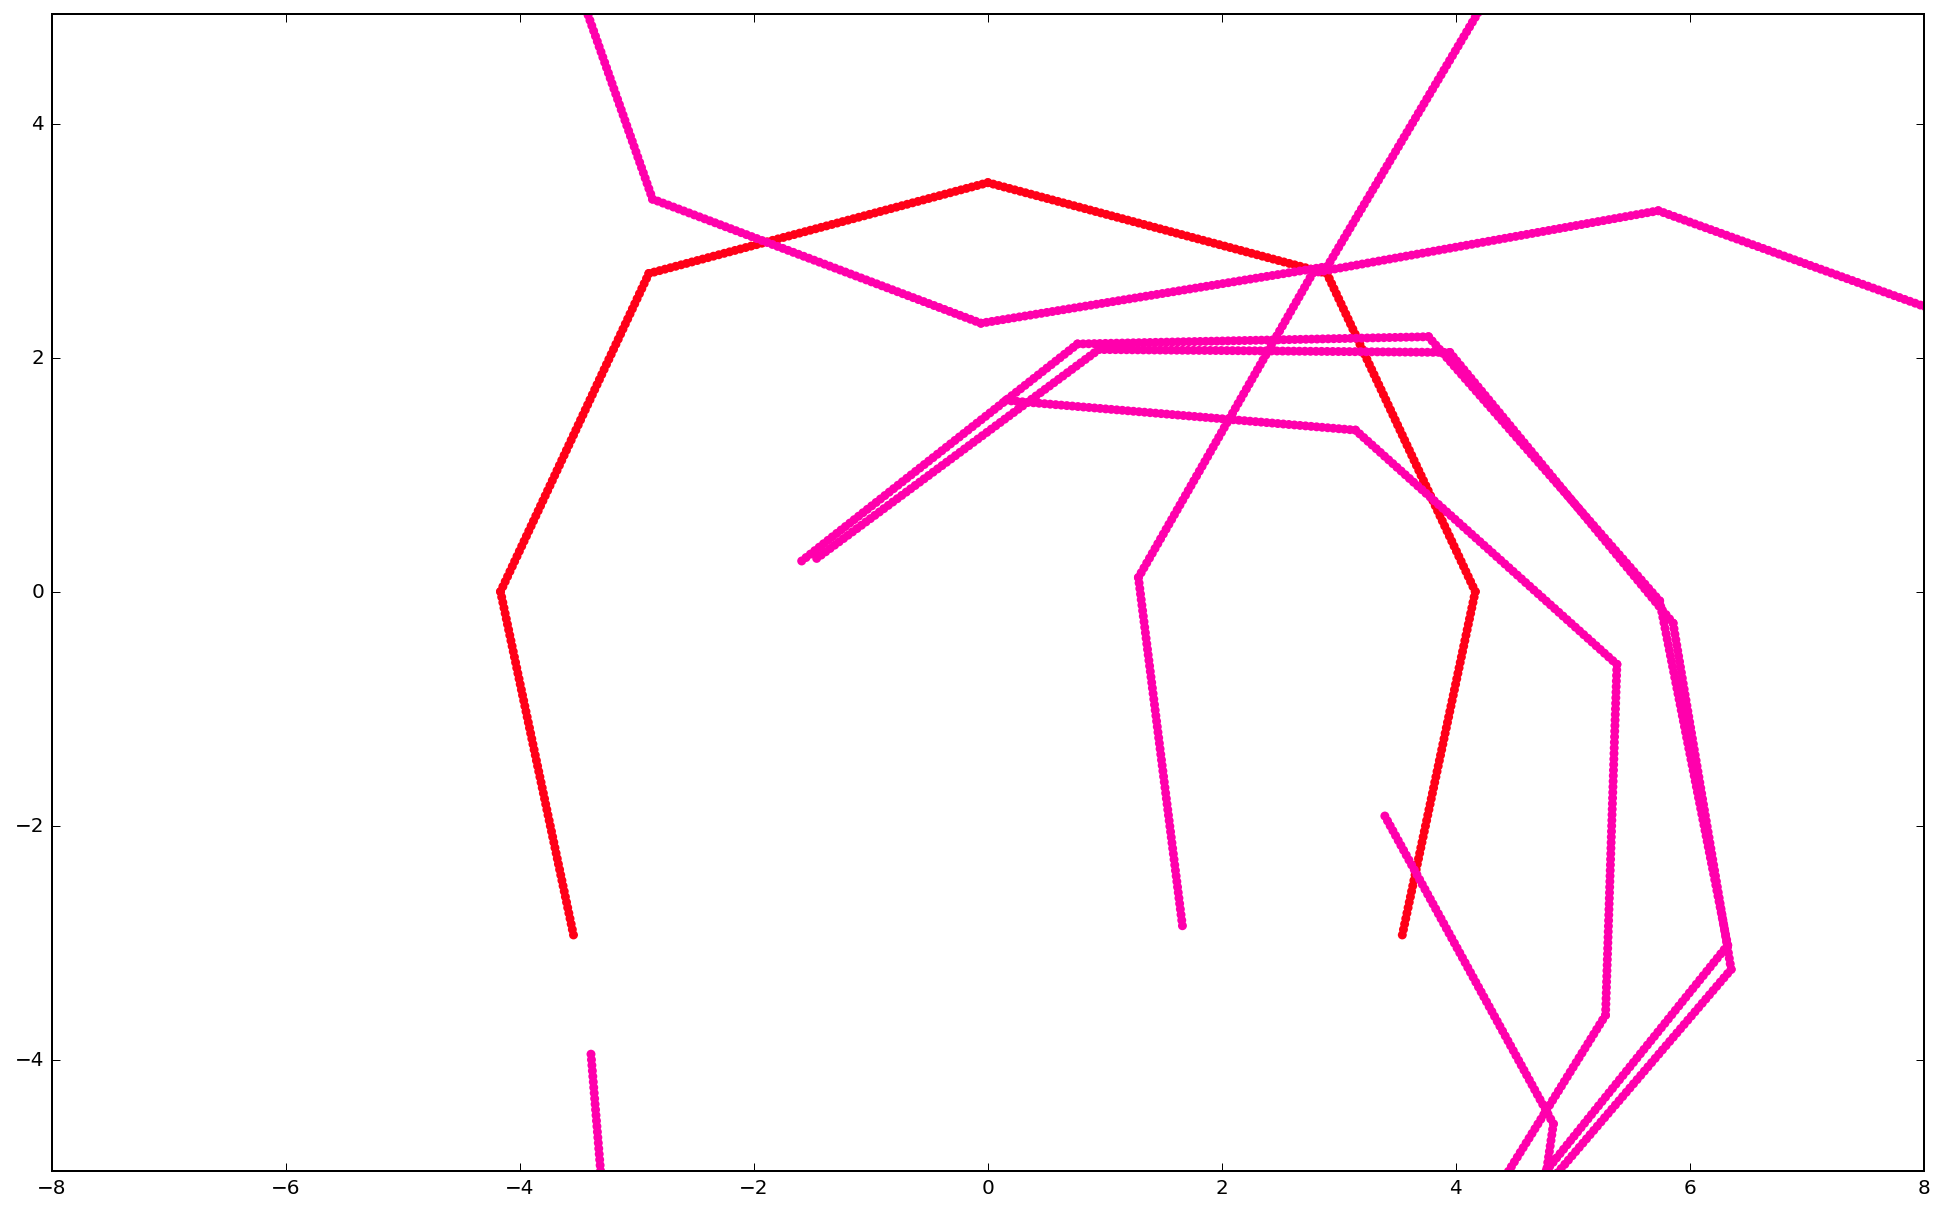

In [19]:
e = el.EdgeGrid(N_lame=25, grid_type='line')
e.sample_structure(N_mirror=1, alpha = .8)
fig, ax = e.plot_structure()

## git


In [ ]:
!git s
#!git add 2015-11-02\ élasticité\ expansion\ en\ miroir.ipynb

In [ ]:
!git commit -am' expansion - miroir de la structure'

In [ ]:
! git push
